In [229]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import time
import pandas as pd
from scipy import signal
from scipy.optimize import curve_fit
import os
from tqdm.notebook import tqdm
import matplotlib.style as mplstyle
import ipywidgets
mplstyle.use('fast')

In [230]:
#check current working directory
retval = os.getcwd()
print ("Current working directory %s" %retval)

Current working directory C:\Users\megas\Documents\Cal\NEFall2022\NE204


In [231]:
# change directory
os.chdir(r'C:\Users\megas\Documents\Cal\NEFall2022\NE204')

#check current working directory
retwal = os.getcwd()
print ("Current working directory %s" %retval)

Current working directory C:\Users\megas\Documents\Cal\NEFall2022\NE204


In [232]:
#Input the data file and find the keys
f = h5py.File(r"C:\Users\megas\Documents\Cal\NEFall2022\Detectors204\lab1\923Data\Cs137-1min.h5", 'r')

#print the keys for the file path
print(f.keys())
print(f['raw_data'])

<KeysViewHDF5 ['event_data', 'raw_data']>
<HDF5 dataset "raw_data": shape (3162, 62500), type "<u2">


In [233]:
pulses = np.array(f['raw_data'])
pulses = p[:-1]

In [237]:
print(type(pulses), pulses.shape)


<class 'numpy.ndarray'> (3160, 62500)


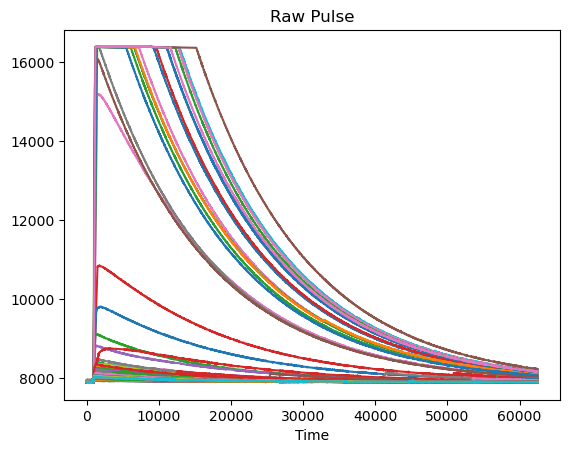

In [190]:
#Plot the raw data
plt.figure()

for i in range(0, 1000):
    plt.plot(pulses[i])
    plt.xlabel('Time')
    plt.title('Raw Pulse')

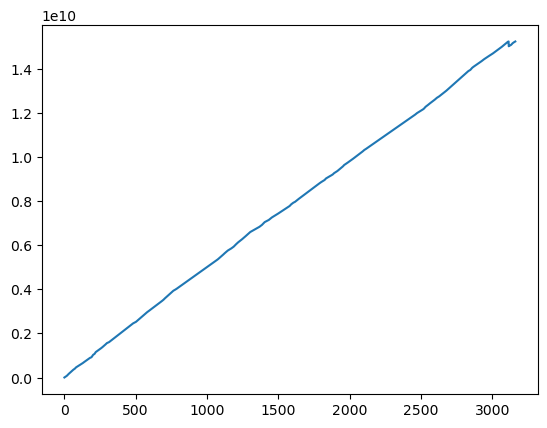

In [136]:
#The second of data is repeated - remove from consideration
plt.plot(f['event_data']['timestamp'])

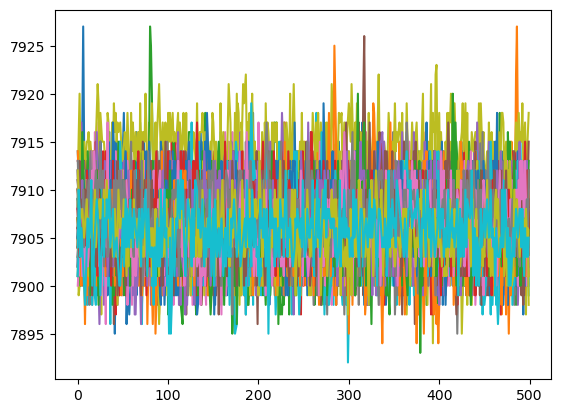

In [210]:
#Plotting the pre-trigger area for a look at the background
for i in range(0,100):
    plt.plot(pulses[i][0:500])

In [214]:
print(pulses.shape)

(3160, 62500)


<class 'numpy.ndarray'>


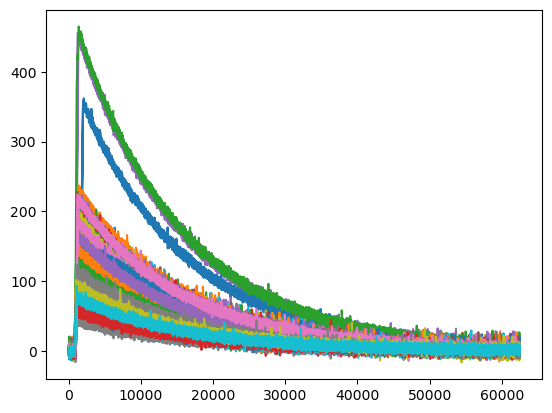

In [248]:
#Background subtraction for the raw data
n = 100
print(type(pulses))
pulses_sub = []
for i in range(n):
    bkg = np.mean(pulses[i][0:500])
    pulses_sub.append(pulses[i] - bkg)
    
for i in range(n):
    plt.plot(pulses_sub[i])

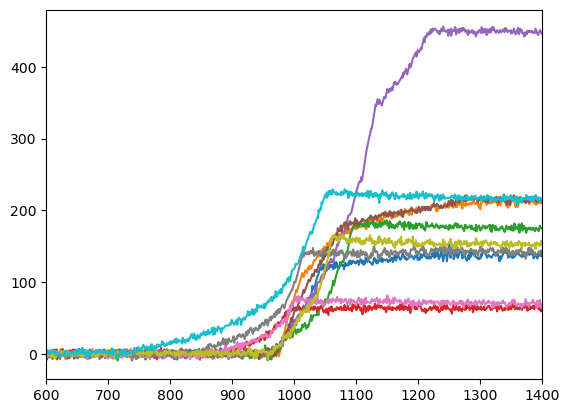

In [256]:
#Plotting the rise of a bunch of data to see possible pileup
for i in range (10):
    plt.plot(pulses_sub[i]) 
    plt.xlim(600,1400) #we expect the rise to be around the pre-trigger value 1000t

In [310]:
#defining an exponential function
def exp_func(x, a, b, c):
    #returns a times e^(-b times a) + c
    return a * np.exp(-b * x) + c


[ 1249  1250  1251 ... 21246 21247 21248]
[153.824 153.824 145.824 ...  35.824  35.824  33.824]
[ 1706  1707  1708 ... 21703 21704 21705]
[222.542 218.542 211.542 ...  56.542  50.542  52.542]
[ 1118  1119  1120 ... 21115 21116 21117]
[185.792 180.792 176.792 ...  43.792  47.792  43.792]
[ 1190  1191  1192 ... 21187 21188 21189]
[72.96 65.96 65.96 ... 17.96 18.96 17.96]
[ 1240  1241  1242 ... 21237 21238 21239]
[456.358 451.358 454.358 ... 116.358 116.358 115.358]


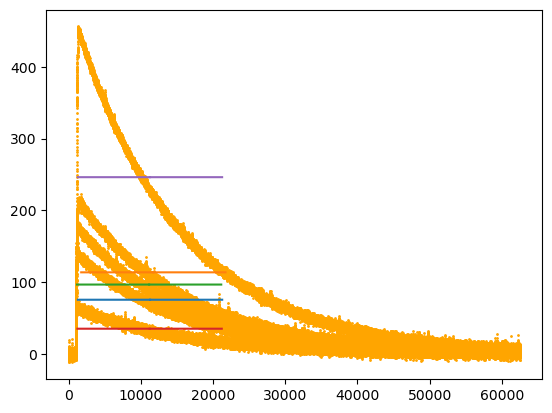

In [311]:
#fit the raw data to the exp function to find tau
imax = []
for i in range(5):
    imax.append(np.argmax(pulses_sub[i]))

exp_sln = []
exp_cov = []
plt.figure()
for i in range(5):
    #setting the ranges for exp fitting and x axis parameters
    endfit = 20000
    s = imax[i]
    x = np.arange(s, endfit+s)
    
    print(x)
    print(pulses_sub[i][s:s+endfit])
    
    popt, pcov = curve_fit(f=exp_func,xdata= x, ydata=pulses_sub[i][s:s+endfit])
    exp_sln.append(popt)
    exp_cov.append(pcov)
    
    #plot fitted exponential against bkg sub raw data
    plt.plot(range(s,s+len(exp_func(x, *popt))),exp_func(x, *popt))
    plt.scatter(np.arange(0,len(pulses_sub[i])),pulses_sub[i], s=1, color='orange')

In [277]:
#find the decay constant
tau_list = []
for i in range(n):
    tau = 1/exp_sln[i][1]
    tau_list.append(tau)
    print("The decay constants, tau, are", tau_list)

The decay constants, tau, are [array([1.        , 1.        , 0.00752185])]
The decay constants, tau, are [array([1.        , 1.        , 0.00752185]), array([1.        , 1.        , 0.00496455])]
The decay constants, tau, are [array([1.        , 1.        , 0.00752185]), array([1.        , 1.        , 0.00496455]), array([1.        , 1.        , 0.00581155])]
The decay constants, tau, are [array([1.        , 1.        , 0.00752185]), array([1.        , 1.        , 0.00496455]), array([1.        , 1.        , 0.00581155]), array([1.        , 1.        , 0.01612149])]
The decay constants, tau, are [array([1.        , 1.        , 0.00752185]), array([1.        , 1.        , 0.00496455]), array([1.        , 1.        , 0.00581155]), array([1.        , 1.        , 0.01612149]), array([1.        , 1.        , 0.00228439])]
The decay constants, tau, are [array([1.        , 1.        , 0.00752185]), array([1.        , 1.        , 0.00496455]), array([1.        , 1.        , 0.00581155]), arra

The decay constants, tau, are [array([1.        , 1.        , 0.00752185]), array([1.        , 1.        , 0.00496455]), array([1.        , 1.        , 0.00581155]), array([1.        , 1.        , 0.01612149]), array([1.        , 1.        , 0.00228439]), array([1.        , 1.        , 0.00500912]), array([1.        , 1.        , 0.01451105]), array([1.        , 1.        , 0.00716148]), array([1.        , 1.        , 0.00662941]), array([1.        , 1.        , 0.00467893]), array([1.        , 1.        , 0.00292657]), array([1.        , 1.        , 0.01701462]), array([1.        , 1.        , 0.00952653]), array([1.        , 1.        , 0.01385214]), array([1.        , 1.        , 0.00472072]), array([1.       , 1.       , 0.0048944]), array([1.        , 1.        , 0.01455562]), array([1.        , 1.        , 0.00977852]), array([1.        , 1.        , 0.01429756]), array([1.       , 1.       , 0.0061027]), array([1.        , 1.        , 0.00471398]), array([1.        , 1.        ,

The decay constants, tau, are [array([1.        , 1.        , 0.00752185]), array([1.        , 1.        , 0.00496455]), array([1.        , 1.        , 0.00581155]), array([1.        , 1.        , 0.01612149]), array([1.        , 1.        , 0.00228439]), array([1.        , 1.        , 0.00500912]), array([1.        , 1.        , 0.01451105]), array([1.        , 1.        , 0.00716148]), array([1.        , 1.        , 0.00662941]), array([1.        , 1.        , 0.00467893]), array([1.        , 1.        , 0.00292657]), array([1.        , 1.        , 0.01701462]), array([1.        , 1.        , 0.00952653]), array([1.        , 1.        , 0.01385214]), array([1.        , 1.        , 0.00472072]), array([1.       , 1.       , 0.0048944]), array([1.        , 1.        , 0.01455562]), array([1.        , 1.        , 0.00977852]), array([1.        , 1.        , 0.01429756]), array([1.       , 1.       , 0.0061027]), array([1.        , 1.        , 0.00471398]), array([1.        , 1.        ,